# Exerc√≠cio 1 - Al√≠nea b): Implementa√ß√£o do Algoritmo K-Means

**Objetivo**: Implementar uma vers√£o simples do algoritmo K-Means para demonstrar como um algoritmo n√£o-supervisionado consegue aprender a distinguir pontos de duas distribui√ß√µes diferentes.

## Estrutura do Exerc√≠cio:
1. Implementa√ß√£o do K-Means com atualiza√ß√£o incremental (online)
2. An√°lise da converg√™ncia com diferentes valores de Œ± e √©pocas
3. Implementa√ß√£o do K-Means com atualiza√ß√£o em batch
4. Compara√ß√£o entre as duas abordagens
5. An√°lise dos resultados por etiqueta
6. Estudo da estabilidade com 30 repeti√ß√µes

## Passo 1: Importar bibliotecas e carregar dados

Vamos carregar os dados gerados na al√≠nea a).

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Definir seed para reprodutibilidade
np.random.seed(42)

# Carregar os dados do ficheiro gerado na al√≠nea a)
df = pd.read_csv('dados_gaussianos.csv')

# Extrair coordenadas e etiquetas
dados = df[['X', 'Y']].values
labels_verdadeiras = df['Label'].values

print(f"Dados carregados: {dados.shape[0]} pontos")
print(f"Primeiras 5 linhas:")
print(df.head())

Dados carregados: 1000 pontos
Primeiras 5 linhas:
          X         Y  Label
0 -2.162040 -0.710127      2
1 -3.646432  0.714689      2
2  1.392517  3.184634      1
3 -2.969861 -0.593975      2
4  2.243649  1.577746      1


## Passo 2: Implementa√ß√£o K-Means com atualiza√ß√£o incremental (Online)

Implementar o algoritmo conforme especificado:
- Escolher dois pontos aleat√≥rios como representantes iniciais (r1 e r2)
- Para cada ponto, atualizar o representante mais pr√≥ximo usando: r ‚Üê (1 - Œ±) √ó r + Œ± √ó x

In [14]:
def kmeans_online(dados, alpha, n_epocas, seed=None):
    """
    Implementa√ß√£o do K-Means com atualiza√ß√£o incremental (online).
    
    Par√¢metros:
    - dados: array de pontos (n_samples, 2)
    - alpha: taxa de aprendizagem
    - n_epocas: n√∫mero de √©pocas
    - seed: seed para reprodutibilidade
    
    Retorna:
    - historico_atualizacoes: lista com todas as posi√ß√µes de r1 e r2 ap√≥s cada atualiza√ß√£o
    - historico_epocas: lista com posi√ß√µes de r1 e r2 no fim de cada √©poca
    """
    if seed is not None:
        np.random.seed(seed)
    
    # Escolher dois pontos aleat√≥rios como representantes iniciais
    indices = np.random.choice(len(dados), size=2, replace=False)
    r1 = dados[indices[0]].copy()
    r2 = dados[indices[1]].copy()
    
    # Armazenar hist√≥rico
    historico_atualizacoes = [(r1.copy(), r2.copy())]  # Posi√ß√µes iniciais
    historico_epocas = []
    
    # Executar √©pocas
    for epoca in range(n_epocas):
        # Para cada ponto no conjunto de dados
        for x in dados:
            # Calcular dist√¢ncias
            dist_r1 = np.linalg.norm(x - r1)
            dist_r2 = np.linalg.norm(x - r2)
            
            # Atualizar o representante mais pr√≥ximo
            if dist_r1 < dist_r2:
                r1 = (1 - alpha) * r1 + alpha * x
                historico_atualizacoes.append((r1.copy(), r2.copy()))
            elif dist_r2 < dist_r1:
                r2 = (1 - alpha) * r2 + alpha * x
                historico_atualizacoes.append((r1.copy(), r2.copy()))
        
        # Guardar posi√ß√£o no fim da √©poca
        historico_epocas.append((r1.copy(), r2.copy()))
        
        print(f"√âpoca {epoca + 1}/{n_epocas}: r1={r1}, r2={r2}")
    
    return historico_atualizacoes, historico_epocas, r1, r2

print("Fun√ß√£o kmeans_online() definida com sucesso.")

Fun√ß√£o kmeans_online() definida com sucesso.


## Passo 3: Executar K-Means com Œ± = 10E-5 e 10 √©pocas

In [15]:
# Par√¢metros iniciais conforme especificado
alpha_inicial = 10e-5
n_epocas_inicial = 10

print(f"Executando K-Means Online com Œ±={alpha_inicial} e {n_epocas_inicial} √©pocas...")
print("=" * 60)

hist_atualizacoes_1, hist_epocas_1, r1_final_1, r2_final_1 = kmeans_online(
    dados, alpha_inicial, n_epocas_inicial, seed=42
)

print("=" * 60)
print(f"\nRepresentantes finais:")
print(f"r1 = {r1_final_1}")
print(f"r2 = {r2_final_1}")
print(f"\nTotal de atualiza√ß√µes: {len(hist_atualizacoes_1)}")
print(f"√âpocas completadas: {len(hist_epocas_1)}")

Executando K-Means Online com Œ±=0.0001 e 10 √©pocas...
√âpoca 1/10: r1=[3.12089265 2.79043822], r2=[4.55196221 1.49080411]
√âpoca 2/10: r1=[2.84220175 2.57854387], r2=[4.51954959 1.45631048]
√âpoca 3/10: r1=[2.56982484 2.35569839], r2=[4.50973076 1.44979087]
√âpoca 4/10: r1=[2.31396292 2.13953305], r2=[4.50721077 1.45674963]
√âpoca 5/10: r1=[2.07641193 1.93779978], r2=[4.50409836 1.4692618 ]
√âpoca 6/10: r1=[1.85387494 1.74803342], r2=[4.49827203 1.48814414]
√âpoca 7/10: r1=[1.64041079 1.56413657], r2=[4.48601195 1.51772842]
√âpoca 8/10: r1=[1.43503265 1.38521028], r2=[4.46650691 1.55577426]
√âpoca 9/10: r1=[1.23783863 1.20958919], r2=[4.44067265 1.60139896]
√âpoca 10/10: r1=[1.04831857 1.03733155], r2=[4.40840328 1.65229799]

Representantes finais:
r1 = [1.04831857 1.03733155]
r2 = [4.40840328 1.65229799]

Total de atualiza√ß√µes: 10001
√âpocas completadas: 10


## Passo 4: Visualizar resultados - Todas as atualiza√ß√µes vs Fim de √©pocas

Criar dois gr√°ficos:
1. Todas as posi√ß√µes consecutivas de r1 e r2 ap√≥s cada atualiza√ß√£o
2. Posi√ß√µes de r1 e r2 apenas no fim de cada √©poca

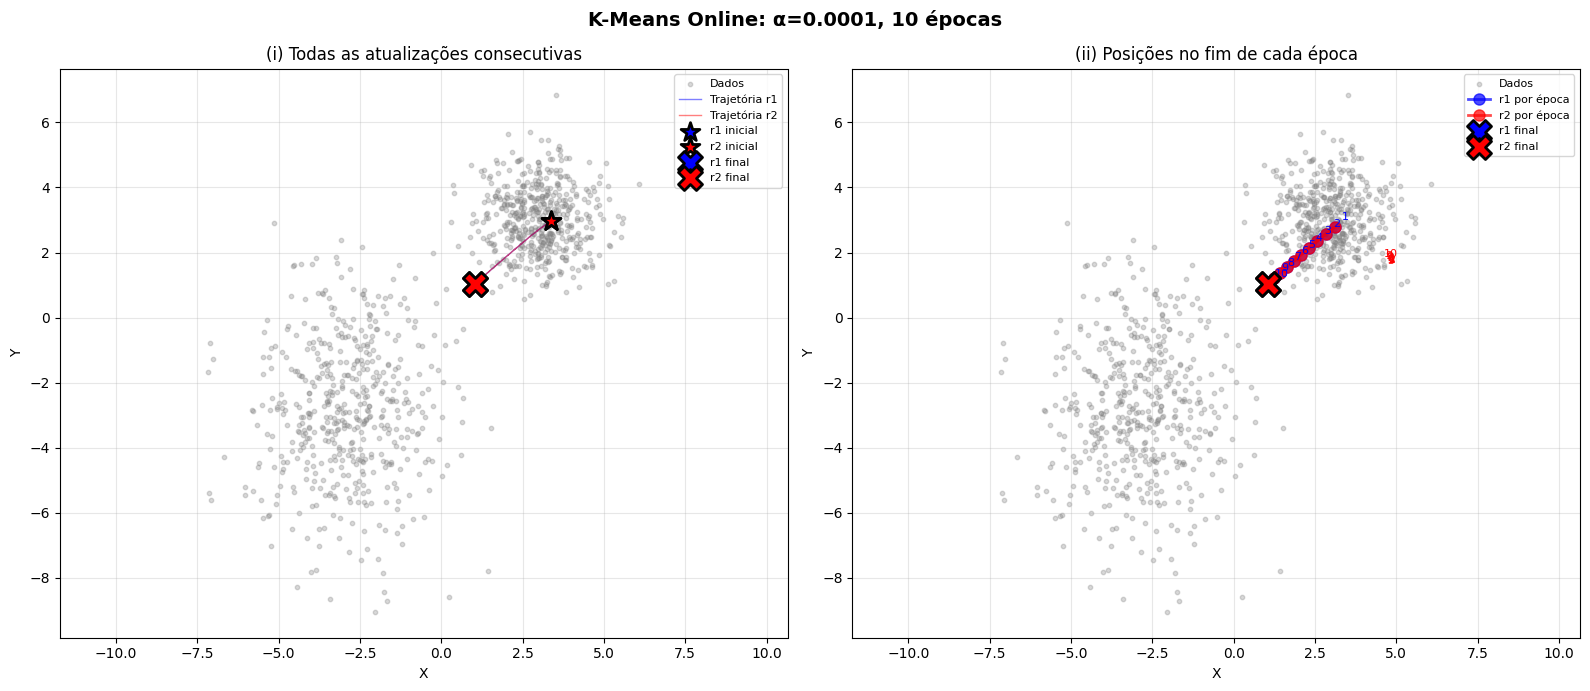

In [16]:
def plot_kmeans_evolution(dados, hist_atualizacoes, hist_epocas, titulo):
    """
    Plota a evolu√ß√£o dos representantes com dois gr√°ficos lado a lado.
    """
    fig, axes = plt.subplots(1, 2, figsize=(16, 7))
    
    # Extrair trajet√≥rias
    r1_traj_atualiz = np.array([r1 for r1, r2 in hist_atualizacoes])
    r2_traj_atualiz = np.array([r1 for r1, r2 in hist_atualizacoes])
    
    r1_traj_epocas = np.array([r1 for r1, r2 in hist_epocas])
    r2_traj_epocas = np.array([r1 for r1, r2 in hist_epocas])
    
    # Gr√°fico 1: Todas as atualiza√ß√µes
    axes[0].scatter(dados[:, 0], dados[:, 1], alpha=0.3, s=10, c='gray', label='Dados')
    axes[0].plot(r1_traj_atualiz[:, 0], r1_traj_atualiz[:, 1], 
                 'b-', alpha=0.5, linewidth=1, label='Trajet√≥ria r1')
    axes[0].plot(r2_traj_atualiz[:, 0], r2_traj_atualiz[:, 1], 
                 'r-', alpha=0.5, linewidth=1, label='Trajet√≥ria r2')
    axes[0].scatter(r1_traj_atualiz[0, 0], r1_traj_atualiz[0, 1], 
                   c='blue', s=200, marker='*', edgecolors='black', linewidth=2, 
                   label='r1 inicial', zorder=5)
    axes[0].scatter(r2_traj_atualiz[0, 0], r2_traj_atualiz[0, 1], 
                   c='red', s=200, marker='*', edgecolors='black', linewidth=2, 
                   label='r2 inicial', zorder=5)
    axes[0].scatter(r1_traj_atualiz[-1, 0], r1_traj_atualiz[-1, 1], 
                   c='blue', s=300, marker='X', edgecolors='black', linewidth=2, 
                   label='r1 final', zorder=5)
    axes[0].scatter(r2_traj_atualiz[-1, 0], r2_traj_atualiz[-1, 1], 
                   c='red', s=300, marker='X', edgecolors='black', linewidth=2, 
                   label='r2 final', zorder=5)
    axes[0].set_xlabel('X')
    axes[0].set_ylabel('Y')
    axes[0].set_title('(i) Todas as atualiza√ß√µes consecutivas')
    axes[0].legend(loc='best', fontsize=8)
    axes[0].grid(True, alpha=0.3)
    axes[0].axis('equal')
    
    # Gr√°fico 2: Fim de cada √©poca
    axes[1].scatter(dados[:, 0], dados[:, 1], alpha=0.3, s=10, c='gray', label='Dados')
    axes[1].plot(r1_traj_epocas[:, 0], r1_traj_epocas[:, 1], 
                 'b-o', alpha=0.7, linewidth=2, markersize=8, label='r1 por √©poca')
    axes[1].plot(r2_traj_epocas[:, 0], r2_traj_epocas[:, 1], 
                 'r-o', alpha=0.7, linewidth=2, markersize=8, label='r2 por √©poca')
    
    # Anotar cada √©poca
    for i, (r1, r2) in enumerate(hist_epocas):
        axes[1].annotate(f'{i+1}', xy=(r1[0], r1[1]), xytext=(5, 5), 
                        textcoords='offset points', fontsize=8, color='blue')
        axes[1].annotate(f'{i+1}', xy=(r2[0], r2[1]), xytext=(5, 5), 
                        textcoords='offset points', fontsize=8, color='red')
    
    axes[1].scatter(r1_traj_epocas[-1, 0], r1_traj_epocas[-1, 1], 
                   c='blue', s=300, marker='X', edgecolors='black', linewidth=2, 
                   label='r1 final', zorder=5)
    axes[1].scatter(r2_traj_epocas[-1, 0], r2_traj_epocas[-1, 1], 
                   c='red', s=300, marker='X', edgecolors='black', linewidth=2, 
                   label='r2 final', zorder=5)
    axes[1].set_xlabel('X')
    axes[1].set_ylabel('Y')
    axes[1].set_title('(ii) Posi√ß√µes no fim de cada √©poca')
    axes[1].legend(loc='best', fontsize=8)
    axes[1].grid(True, alpha=0.3)
    axes[1].axis('equal')
    
    fig.suptitle(titulo, fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

# Plotar resultados iniciais
plot_kmeans_evolution(dados, hist_atualizacoes_1, hist_epocas_1, 
                      f'K-Means Online: Œ±={alpha_inicial}, {n_epocas_inicial} √©pocas')

## Passo 5: Testar com diferentes valores de Œ± e n√∫mero de √©pocas

Vamos experimentar com valores diferentes para observar melhor a converg√™ncia e tend√™ncia das atualiza√ß√µes.

Experimento 2: Œ±=0.01, 20 √©pocas
√âpoca 1/20: r1=[-2.94293421 -2.88884078], r2=[3.06106218 2.9796514 ]
√âpoca 2/20: r1=[-2.99300485 -2.94100731], r2=[3.03491713 2.99534498]
√âpoca 3/20: r1=[-2.99361678 -2.94187839], r2=[3.03415029 2.99516783]
√âpoca 4/20: r1=[-2.993621  -2.9418844], r2=[3.0341455  2.99516672]
√âpoca 5/20: r1=[-2.99362103 -2.94188445], r2=[3.03414547 2.99516671]
√âpoca 6/20: r1=[-2.99362103 -2.94188445], r2=[3.03414547 2.99516671]
√âpoca 7/20: r1=[-2.99362103 -2.94188445], r2=[3.03414547 2.99516671]
√âpoca 8/20: r1=[-2.99362103 -2.94188445], r2=[3.03414547 2.99516671]
√âpoca 9/20: r1=[-2.99362103 -2.94188445], r2=[3.03414547 2.99516671]
√âpoca 10/20: r1=[-2.99362103 -2.94188445], r2=[3.03414547 2.99516671]
√âpoca 11/20: r1=[-2.99362103 -2.94188445], r2=[3.03414547 2.99516671]
√âpoca 12/20: r1=[-2.99362103 -2.94188445], r2=[3.03414547 2.99516671]
√âpoca 13/20: r1=[-2.99362103 -2.94188445], r2=[3.03414547 2.99516671]
√âpoca 14/20: r1=[-2.99362103 -2.94188445], r2=[3.034

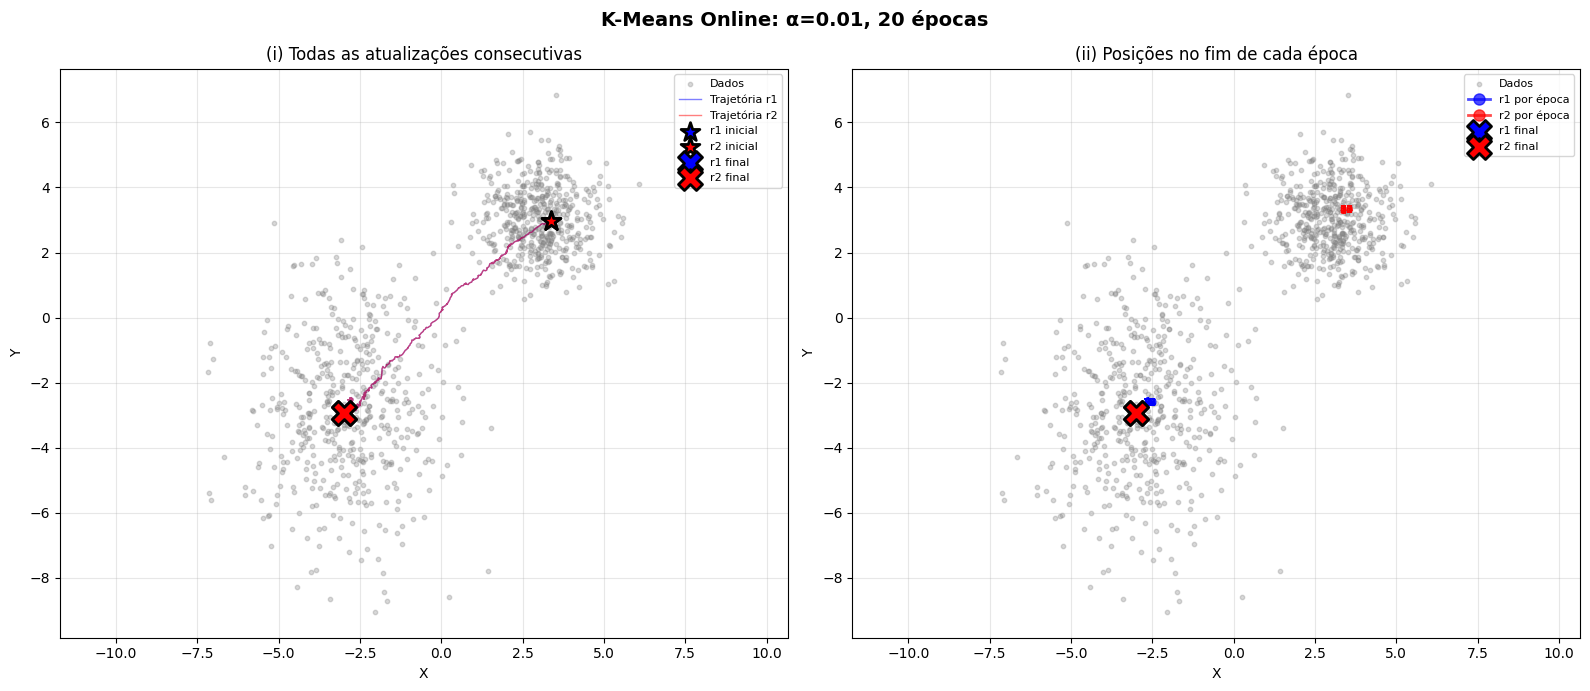

In [17]:
# Experimento 2: Œ± maior para ver converg√™ncia mais r√°pida
alpha_2 = 0.01
n_epocas_2 = 20

print(f"Experimento 2: Œ±={alpha_2}, {n_epocas_2} √©pocas")
print("=" * 60)
hist_atualizacoes_2, hist_epocas_2, r1_final_2, r2_final_2 = kmeans_online(
    dados, alpha_2, n_epocas_2, seed=42
)
print("=" * 60)

plot_kmeans_evolution(dados, hist_atualizacoes_2, hist_epocas_2, 
                      f'K-Means Online: Œ±={alpha_2}, {n_epocas_2} √©pocas')


Experimento 3: Œ±=0.1, 10 √©pocas
√âpoca 1/10: r1=[-2.87287345 -2.93957534], r2=[2.97662655 3.16429111]
√âpoca 2/10: r1=[-2.87287345 -2.93957534], r2=[2.97662655 3.16429111]
√âpoca 3/10: r1=[-2.87287345 -2.93957534], r2=[2.97662655 3.16429111]
√âpoca 4/10: r1=[-2.87287345 -2.93957534], r2=[2.97662655 3.16429111]
√âpoca 5/10: r1=[-2.87287345 -2.93957534], r2=[2.97662655 3.16429111]
√âpoca 6/10: r1=[-2.87287345 -2.93957534], r2=[2.97662655 3.16429111]
√âpoca 7/10: r1=[-2.87287345 -2.93957534], r2=[2.97662655 3.16429111]
√âpoca 8/10: r1=[-2.87287345 -2.93957534], r2=[2.97662655 3.16429111]
√âpoca 9/10: r1=[-2.87287345 -2.93957534], r2=[2.97662655 3.16429111]
√âpoca 10/10: r1=[-2.87287345 -2.93957534], r2=[2.97662655 3.16429111]


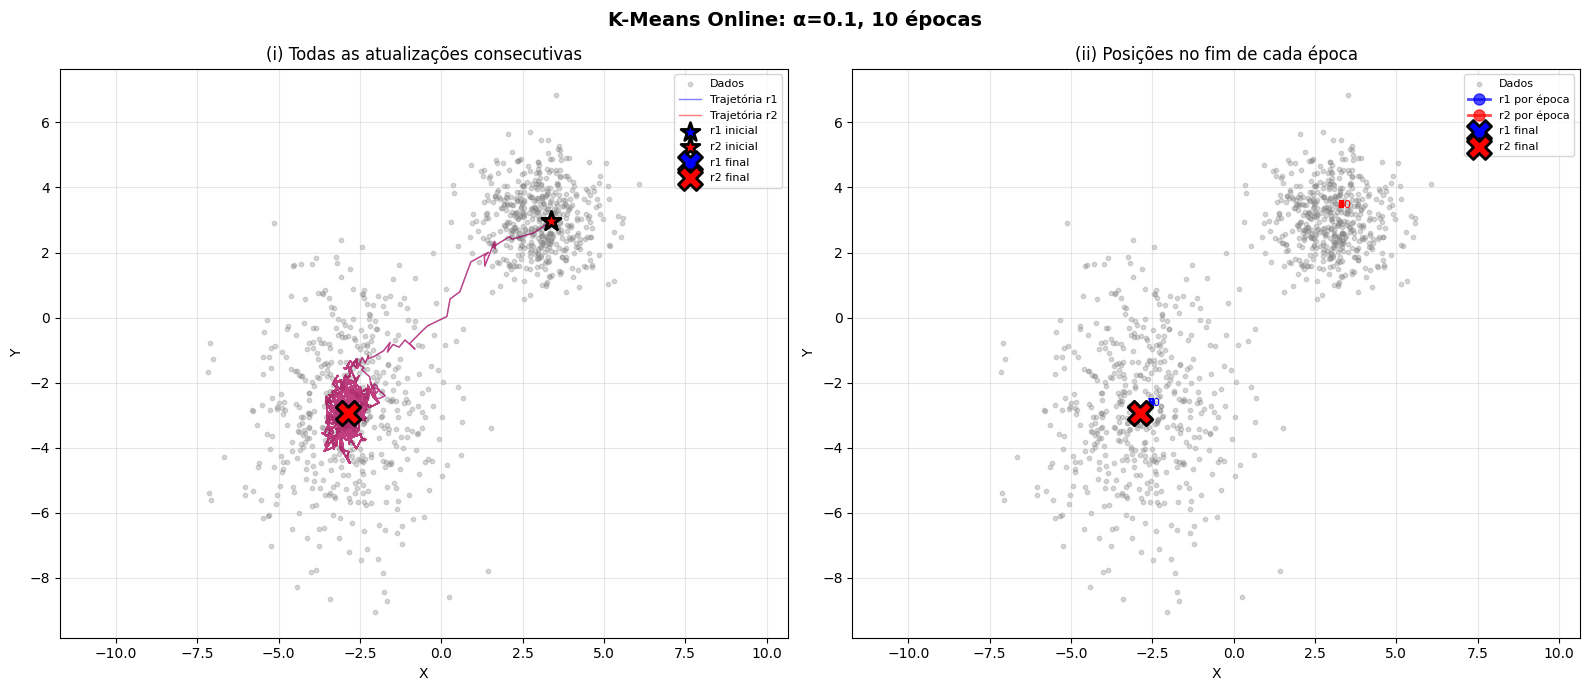

In [18]:
# Experimento 3: Œ± ainda maior para converg√™ncia muito r√°pida
alpha_3 = 0.1
n_epocas_3 = 10

print(f"\nExperimento 3: Œ±={alpha_3}, {n_epocas_3} √©pocas")
print("=" * 60)
hist_atualizacoes_3, hist_epocas_3, r1_final_3, r2_final_3 = kmeans_online(
    dados, alpha_3, n_epocas_3, seed=42
)
print("=" * 60)

plot_kmeans_evolution(dados, hist_atualizacoes_3, hist_epocas_3, 
                      f'K-Means Online: Œ±={alpha_3}, {n_epocas_3} √©pocas')

### Discuss√£o da evolu√ß√£o dos representantes

**Observa√ß√µes sobre diferentes valores de Œ±:**

1. **Œ± muito pequeno (10E-5)**: Converg√™ncia muito lenta, os representantes movem-se pouco em cada atualiza√ß√£o
2. **Œ± m√©dio (0.01)**: Converg√™ncia moderada, equil√≠brio entre estabilidade e velocidade
3. **Œ± grande (0.1)**: Converg√™ncia r√°pida, mas pode oscilar mais

**Rela√ß√£o com os par√¢metros de gera√ß√£o:**

Os representantes finais devem tender para os centros das distribui√ß√µes originais:
- Conjunto 1: m√©dia [3, 3]
- Conjunto 2: m√©dia [-3, -3]

## Passo 6: Implementa√ß√£o K-Means com atualiza√ß√£o em Batch

Em vez de atualizar ap√≥s cada ponto, acumular as altera√ß√µes e atualizar apenas no fim de cada √©poca.

In [19]:
def kmeans_batch(dados, alpha, n_epocas, seed=None):
    """
    Implementa√ß√£o do K-Means com atualiza√ß√£o em batch.
    Acumula as altera√ß√µes e atualiza apenas no fim de cada √©poca.
    
    Par√¢metros:
    - dados: array de pontos (n_samples, 2)
    - alpha: taxa de aprendizagem
    - n_epocas: n√∫mero de √©pocas
    - seed: seed para reprodutibilidade
    
    Retorna:
    - historico_epocas: lista com posi√ß√µes de r1 e r2 no fim de cada √©poca
    """
    if seed is not None:
        np.random.seed(seed)
    
    # Escolher dois pontos aleat√≥rios como representantes iniciais
    indices = np.random.choice(len(dados), size=2, replace=False)
    r1 = dados[indices[0]].copy()
    r2 = dados[indices[1]].copy()
    
    # Armazenar hist√≥rico
    historico_epocas = [(r1.copy(), r2.copy())]  # Posi√ß√£o inicial
    
    n_exemplos = len(dados)
    
    # Executar √©pocas
    for epoca in range(n_epocas):
        # Acumuladores de altera√ß√µes
        d1 = np.zeros(2)
        d2 = np.zeros(2)
        n1 = 0  # N√∫mero de pontos atribu√≠dos a r1
        n2 = 0  # N√∫mero de pontos atribu√≠dos a r2
        
        # Para cada ponto, acumular as altera√ß√µes
        for x in dados:
            # Calcular dist√¢ncias
            dist_r1 = np.linalg.norm(x - r1)
            dist_r2 = np.linalg.norm(x - r2)
            
            # Acumular a diferen√ßa para o representante mais pr√≥ximo
            if dist_r1 < dist_r2:
                d1 += (x - r1)
                n1 += 1
            elif dist_r2 < dist_r1:
                d2 += (x - r2)
                n2 += 1
        
        # Atualizar representantes com as altera√ß√µes acumuladas
        if n1 > 0:
            r1 = r1 + (alpha / n1) * d1
        if n2 > 0:
            r2 = r2 + (alpha / n2) * d2
        
        # Guardar posi√ß√£o no fim da √©poca
        historico_epocas.append((r1.copy(), r2.copy()))
        
        print(f"√âpoca {epoca + 1}/{n_epocas}: r1={r1} (n1={n1}), r2={r2} (n2={n2})")
    
    return historico_epocas, r1, r2

print("Fun√ß√£o kmeans_batch() definida com sucesso.")

Fun√ß√£o kmeans_batch() definida com sucesso.


In [20]:
# Executar K-Means batch com Œ± = 0.01 e 20 √©pocas
alpha_batch = 0.01
n_epocas_batch = 20

print(f"Executando K-Means Batch com Œ±={alpha_batch} e {n_epocas_batch} √©pocas...")
print("=" * 60)

hist_epocas_batch, r1_final_batch, r2_final_batch = kmeans_batch(
    dados, alpha_batch, n_epocas_batch, seed=42
)

print("=" * 60)
print(f"\nRepresentantes finais (Batch):")
print(f"r1 = {r1_final_batch}")
print(f"r2 = {r2_final_batch}")

Executando K-Means Batch com Œ±=0.01 e 20 √©pocas...
√âpoca 1/20: r1=[3.35229958 2.94741592] (n1=788), r2=[4.58109187 1.52193147] (n2=212)
√âpoca 2/20: r1=[3.32153644 2.9288336 ] (n1=769), r2=[4.52858656 1.47425021] (n2=231)
√âpoca 3/20: r1=[3.29166602 2.91132941] (n1=754), r2=[4.47538944 1.42695435] (n2=246)
√âpoca 4/20: r1=[3.262922   2.89519016] (n1=734), r2=[4.42128671 1.38018167] (n2=266)
√âpoca 5/20: r1=[3.23557109 2.88063917] (n1=712), r2=[4.3660244  1.33382316] (n2=288)
√âpoca 6/20: r1=[3.20987949 2.86786032] (n1=689), r2=[4.30945211 1.28779727] (n2=311)
√âpoca 7/20: r1=[3.18600052 2.85706929] (n1=660), r2=[4.25209535 1.24277611] (n2=340)
√âpoca 8/20: r1=[3.1632647  2.84739883] (n1=645), r2=[4.19461898 1.19847925] (n2=355)
√âpoca 9/20: r1=[3.14220882 2.83926295] (n1=626), r2=[4.13650932 1.15479782] (n2=374)
√âpoca 10/20: r1=[3.12257166 2.83234024] (n1=611), r2=[4.07811424 1.11178197] (n2=389)
√âpoca 11/20: r1=[3.10460735 2.82680716] (n1=593), r2=[4.01942623 1.06961368] (n2=407)

## Passo 7: Comparar Online vs Batch

Visualizar as trajet√≥rias dos representantes nas duas abordagens.

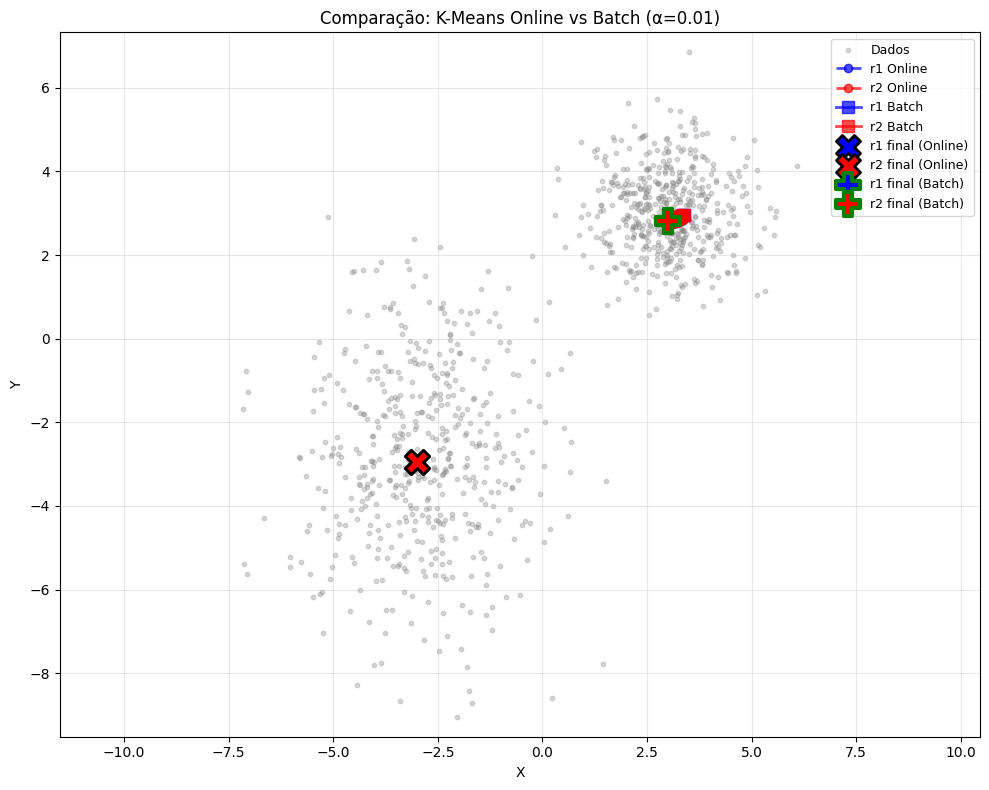


=== Compara√ß√£o de Resultados Finais ===
Online - r1: [-2.99362103 -2.94188445], r2: [3.03414547 2.99516671]
Batch  - r1: [3.00926834 2.82132597], r2: [3.49072591 0.72603804]

Par√¢metros originais das distribui√ß√µes:
Conjunto 1: m√©dia [3, 3]
Conjunto 2: m√©dia [-3, -3]


In [21]:
# Comparar Online vs Batch
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

# Plotar dados
ax.scatter(dados[:, 0], dados[:, 1], alpha=0.3, s=10, c='gray', label='Dados')

# Extrair trajet√≥rias do experimento online (exp 2)
r1_online = np.array([r1 for r1, r2 in hist_epocas_2])
r2_online = np.array([r1 for r1, r2 in hist_epocas_2])

# Extrair trajet√≥rias batch
r1_batch = np.array([r1 for r1, r2 in hist_epocas_batch])
r2_batch = np.array([r1 for r1, r2 in hist_epocas_batch])

# Plotar trajet√≥rias online
ax.plot(r1_online[:, 0], r1_online[:, 1], 'b--o', alpha=0.7, linewidth=2, 
        markersize=6, label='r1 Online')
ax.plot(r2_online[:, 0], r2_online[:, 1], 'r--o', alpha=0.7, linewidth=2, 
        markersize=6, label='r2 Online')

# Plotar trajet√≥rias batch
ax.plot(r1_batch[:, 0], r1_batch[:, 1], 'b-s', alpha=0.7, linewidth=2, 
        markersize=8, label='r1 Batch')
ax.plot(r2_batch[:, 0], r2_batch[:, 1], 'r-s', alpha=0.7, linewidth=2, 
        markersize=8, label='r2 Batch')

# Marcar posi√ß√µes finais
ax.scatter(r1_online[-1, 0], r1_online[-1, 1], c='blue', s=300, marker='X', 
          edgecolors='black', linewidth=2, label='r1 final (Online)', zorder=5)
ax.scatter(r2_online[-1, 0], r2_online[-1, 1], c='red', s=300, marker='X', 
          edgecolors='black', linewidth=2, label='r2 final (Online)', zorder=5)

ax.scatter(r1_batch[-1, 0], r1_batch[-1, 1], c='blue', s=300, marker='P', 
          edgecolors='green', linewidth=3, label='r1 final (Batch)', zorder=5)
ax.scatter(r2_batch[-1, 0], r2_batch[-1, 1], c='red', s=300, marker='P', 
          edgecolors='green', linewidth=3, label='r2 final (Batch)', zorder=5)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title(f'Compara√ß√£o: K-Means Online vs Batch (Œ±={alpha_batch})')
ax.legend(loc='best', fontsize=9)
ax.grid(True, alpha=0.3)
ax.axis('equal')
plt.tight_layout()
plt.show()

print("\n=== Compara√ß√£o de Resultados Finais ===")
print(f"Online - r1: {r1_final_2}, r2: {r2_final_2}")
print(f"Batch  - r1: {r1_final_batch}, r2: {r2_final_batch}")
print(f"\nPar√¢metros originais das distribui√ß√µes:")
print(f"Conjunto 1: m√©dia [3, 3]")
print(f"Conjunto 2: m√©dia [-3, -3]")

## Passo 8: An√°lise por etiquetas

Mostrar num gr√°fico com cores diferentes os pontos conforme sua proximidade aos representantes e suas etiquetas verdadeiras.

C:\Users\alexa\AppData\Local\Temp\ipykernel_21980\4056805129.py:29: UserWarning: You passed a edgecolor/edgecolors ('darkcyan') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(dados[grupo2, 0], dados[grupo2, 1], c='cyan', marker='x', s=50,
C:\Users\alexa\AppData\Local\Temp\ipykernel_21980\4056805129.py:31: UserWarning: You passed a edgecolor/edgecolors ('darkorange') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(dados[grupo3, 0], dados[grupo3, 1], c='orange', marker='x', s=50,


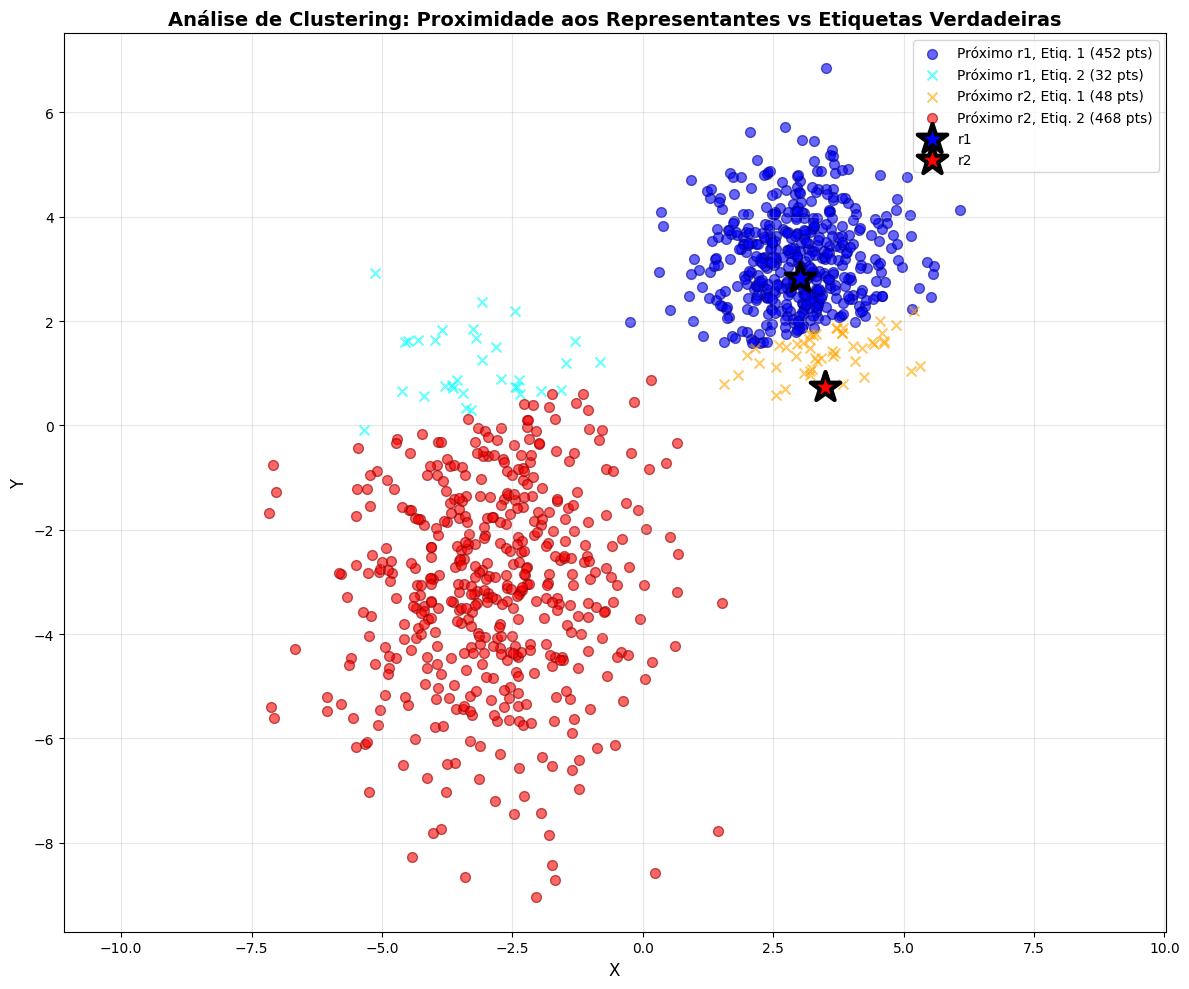


=== An√°lise de Resultados ===
Pontos pr√≥ximos de r1 com etiqueta 1 (correto): 452
Pontos pr√≥ximos de r1 com etiqueta 2 (erro): 32
Pontos pr√≥ximos de r2 com etiqueta 1 (erro): 48
Pontos pr√≥ximos de r2 com etiqueta 2 (correto): 468

Acur√°cia do clustering: 92.00%
Total de pontos classificados corretamente: 920/1000


In [22]:
# Usar os representantes finais do batch
r1_final = r1_final_batch
r2_final = r2_final_batch

# Calcular dist√¢ncias de cada ponto aos representantes
dist_r1 = np.linalg.norm(dados - r1_final, axis=1)
dist_r2 = np.linalg.norm(dados - r2_final, axis=1)

# Atribuir cada ponto ao representante mais pr√≥ximo
cluster_atribuido = np.where(dist_r1 < dist_r2, 1, 2)

# Criar 4 grupos:
# Grupo 1: Pr√≥ximos de r1 com etiqueta 1
# Grupo 2: Pr√≥ximos de r1 com etiqueta 2
# Grupo 3: Pr√≥ximos de r2 com etiqueta 1
# Grupo 4: Pr√≥ximos de r2 com etiqueta 2

grupo1 = (cluster_atribuido == 1) & (labels_verdadeiras == 1)  # r1, label 1 - Correto
grupo2 = (cluster_atribuido == 1) & (labels_verdadeiras == 2)  # r1, label 2 - Erro
grupo3 = (cluster_atribuido == 2) & (labels_verdadeiras == 1)  # r2, label 1 - Erro
grupo4 = (cluster_atribuido == 2) & (labels_verdadeiras == 2)  # r2, label 2 - Correto

# Visualiza√ß√£o
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Plotar os 4 grupos com cores diferentes
ax.scatter(dados[grupo1, 0], dados[grupo1, 1], c='blue', marker='o', s=50, 
          alpha=0.6, label=f'Pr√≥ximo r1, Etiq. 1 ({np.sum(grupo1)} pts)', edgecolors='darkblue')
ax.scatter(dados[grupo2, 0], dados[grupo2, 1], c='cyan', marker='x', s=50, 
          alpha=0.6, label=f'Pr√≥ximo r1, Etiq. 2 ({np.sum(grupo2)} pts)', edgecolors='darkcyan')
ax.scatter(dados[grupo3, 0], dados[grupo3, 1], c='orange', marker='x', s=50, 
          alpha=0.6, label=f'Pr√≥ximo r2, Etiq. 1 ({np.sum(grupo3)} pts)', edgecolors='darkorange')
ax.scatter(dados[grupo4, 0], dados[grupo4, 1], c='red', marker='o', s=50, 
          alpha=0.6, label=f'Pr√≥ximo r2, Etiq. 2 ({np.sum(grupo4)} pts)', edgecolors='darkred')

# Plotar representantes
ax.scatter(r1_final[0], r1_final[1], c='blue', s=500, marker='*', 
          edgecolors='black', linewidth=3, label='r1', zorder=10)
ax.scatter(r2_final[0], r2_final[1], c='red', s=500, marker='*', 
          edgecolors='black', linewidth=3, label='r2', zorder=10)

ax.set_xlabel('X', fontsize=12)
ax.set_ylabel('Y', fontsize=12)
ax.set_title('An√°lise de Clustering: Proximidade aos Representantes vs Etiquetas Verdadeiras', 
            fontsize=14, fontweight='bold')
ax.legend(loc='best', fontsize=10)
ax.grid(True, alpha=0.3)
ax.axis('equal')
plt.tight_layout()
plt.show()

# Calcular acur√°cia
corretos = np.sum(grupo1) + np.sum(grupo4)
total = len(dados)
acuracia = corretos / total * 100

print("\n=== An√°lise de Resultados ===")
print(f"Pontos pr√≥ximos de r1 com etiqueta 1 (correto): {np.sum(grupo1)}")
print(f"Pontos pr√≥ximos de r1 com etiqueta 2 (erro): {np.sum(grupo2)}")
print(f"Pontos pr√≥ximos de r2 com etiqueta 1 (erro): {np.sum(grupo3)}")
print(f"Pontos pr√≥ximos de r2 com etiqueta 2 (correto): {np.sum(grupo4)}")
print(f"\nAcur√°cia do clustering: {acuracia:.2f}%")
print(f"Total de pontos classificados corretamente: {corretos}/{total}")

## Passo 9: Repetir experi√™ncia 30 vezes

Executar o K-Means 30 vezes com diferentes inicializa√ß√µes aleat√≥rias e mostrar a distribui√ß√£o dos representantes finais.

In [23]:
# Par√¢metros para as 30 repeti√ß√µes
n_repeticoes = 30
alpha_final = 0.01
n_epocas_final = 20

# Armazenar resultados finais
resultados_r1 = []
resultados_r2 = []

print(f"Executando {n_repeticoes} repeti√ß√µes com Œ±={alpha_final} e {n_epocas_final} √©pocas...")
print("=" * 60)

for i in range(n_repeticoes):
    # Usar seed diferente para cada repeti√ß√£o
    _, r1_final, r2_final = kmeans_batch(dados, alpha_final, n_epocas_final, seed=100+i)
    resultados_r1.append(r1_final)
    resultados_r2.append(r2_final)
    print(f"Repeti√ß√£o {i+1}: r1={r1_final}, r2={r2_final}")

print("=" * 60)

# Converter para arrays
resultados_r1 = np.array(resultados_r1)
resultados_r2 = np.array(resultados_r2)

print(f"\n=== Estat√≠sticas das {n_repeticoes} Repeti√ß√µes ===")
print(f"r1 - M√©dia: {np.mean(resultados_r1, axis=0)}")
print(f"r1 - Desvio padr√£o: {np.std(resultados_r1, axis=0)}")
print(f"r2 - M√©dia: {np.mean(resultados_r2, axis=0)}")
print(f"r2 - Desvio padr√£o: {np.std(resultados_r2, axis=0)}")

Executando 30 repeti√ß√µes com Œ±=0.01 e 20 √©pocas...
√âpoca 1/20: r1=[-3.00341564 -2.63653673] (n1=286), r2=[-2.21249247 -2.83455266] (n2=714)
√âpoca 2/20: r1=[-3.01152718 -2.63431654] (n1=289), r2=[-2.17405246 -2.79515921] (n2=711)
√âpoca 3/20: r1=[-3.0197807 -2.6329072] (n1=288), r2=[-2.13598309 -2.75589012] (n2=712)
√âpoca 4/20: r1=[-3.0280595  -2.63245482] (n1=289), r2=[-2.09817366 -2.71657949] (n2=711)
√âpoca 5/20: r1=[-3.03636452 -2.63328923] (n1=290), r2=[-2.06062044 -2.67708522] (n2=710)
√âpoca 6/20: r1=[-3.04449971 -2.63489166] (n1=293), r2=[-2.02324468 -2.6374966 ] (n2=707)
√âpoca 7/20: r1=[-3.05253181 -2.63748817] (n1=294), r2=[-1.98617344 -2.59782549] (n2=706)
√âpoca 8/20: r1=[-3.0602974  -2.64047136] (n1=298), r2=[-1.94923675 -2.55813524] (n2=702)
√âpoca 9/20: r1=[-3.06756171 -2.64476043] (n1=306), r2=[-1.912218   -2.51775646] (n2=694)
√âpoca 10/20: r1=[-3.07466079 -2.64952814] (n1=307), r2=[-1.87553052 -2.47748479] (n2=693)
√âpoca 11/20: r1=[-3.0814426  -2.65516457] (n1

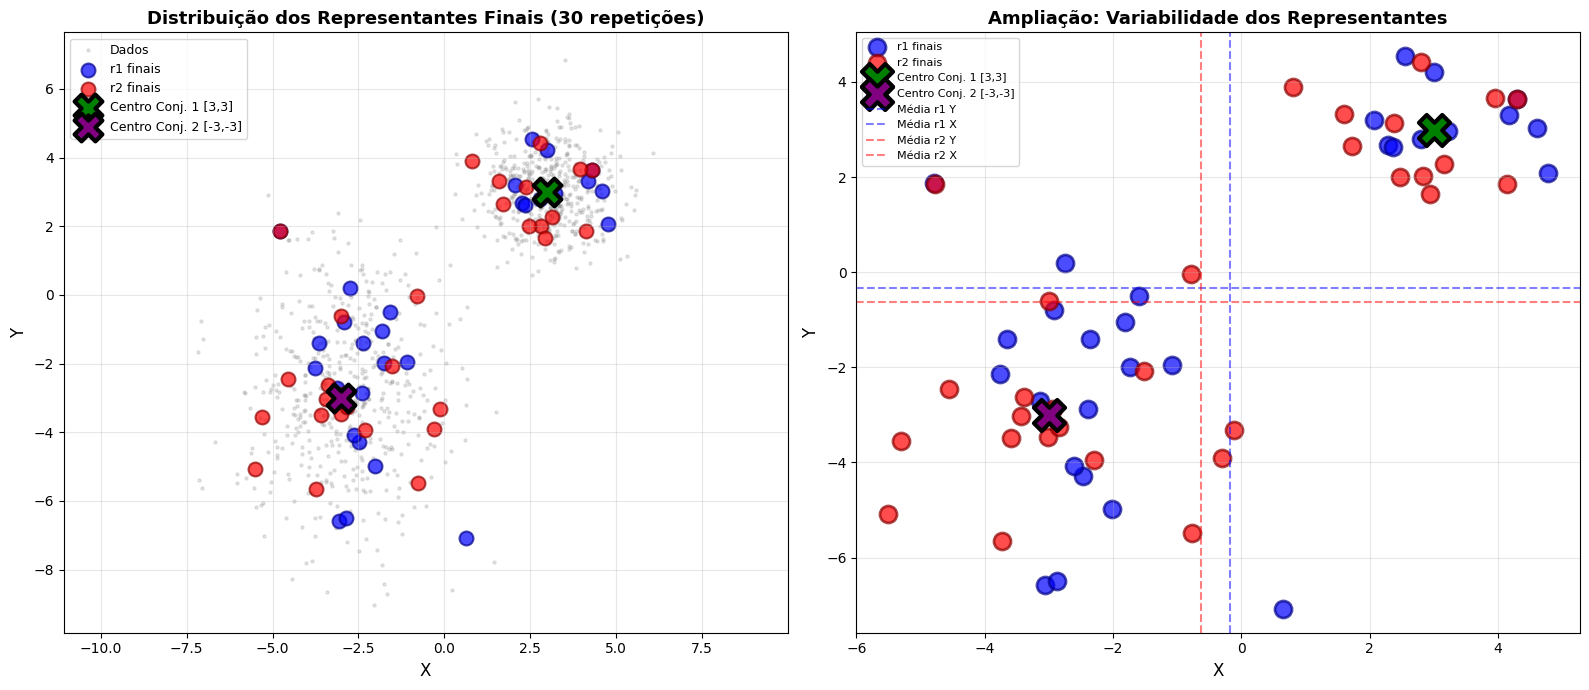

In [24]:
# Visualizar a distribui√ß√£o dos representantes finais
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Gr√°fico 1: Vis√£o geral
axes[0].scatter(dados[:, 0], dados[:, 1], alpha=0.2, s=5, c='gray', label='Dados')
axes[0].scatter(resultados_r1[:, 0], resultados_r1[:, 1], c='blue', s=100, 
               marker='o', alpha=0.7, edgecolors='darkblue', linewidth=1.5, label='r1 finais')
axes[0].scatter(resultados_r2[:, 0], resultados_r2[:, 1], c='red', s=100, 
               marker='o', alpha=0.7, edgecolors='darkred', linewidth=1.5, label='r2 finais')

# Marcar os centros verdadeiros
axes[0].scatter(3, 3, c='green', s=400, marker='X', edgecolors='black', 
               linewidth=3, label='Centro Conj. 1 [3,3]', zorder=10)
axes[0].scatter(-3, -3, c='purple', s=400, marker='X', edgecolors='black', 
               linewidth=3, label='Centro Conj. 2 [-3,-3]', zorder=10)

axes[0].set_xlabel('X', fontsize=12)
axes[0].set_ylabel('Y', fontsize=12)
axes[0].set_title(f'Distribui√ß√£o dos Representantes Finais ({n_repeticoes} repeti√ß√µes)', 
                 fontsize=13, fontweight='bold')
axes[0].legend(loc='best', fontsize=9)
axes[0].grid(True, alpha=0.3)
axes[0].axis('equal')

# Gr√°fico 2: Amplia√ß√£o (zoom) nos representantes
# Calcular limites para zoom
r1_min, r1_max = resultados_r1.min(axis=0), resultados_r1.max(axis=0)
r2_min, r2_max = resultados_r2.min(axis=0), resultados_r2.max(axis=0)

margin = 0.5
x_min = min(r1_min[0], r2_min[0]) - margin
x_max = max(r1_max[0], r2_max[0]) + margin
y_min = min(r1_min[1], r2_min[1]) - margin
y_max = max(r1_max[1], r2_max[1]) + margin

axes[1].scatter(resultados_r1[:, 0], resultados_r1[:, 1], c='blue', s=150, 
               marker='o', alpha=0.7, edgecolors='darkblue', linewidth=2, label='r1 finais')
axes[1].scatter(resultados_r2[:, 0], resultados_r2[:, 1], c='red', s=150, 
               marker='o', alpha=0.7, edgecolors='darkred', linewidth=2, label='r2 finais')

# Marcar os centros verdadeiros
axes[1].scatter(3, 3, c='green', s=500, marker='X', edgecolors='black', 
               linewidth=3, label='Centro Conj. 1 [3,3]', zorder=10)
axes[1].scatter(-3, -3, c='purple', s=500, marker='X', edgecolors='black', 
               linewidth=3, label='Centro Conj. 2 [-3,-3]', zorder=10)

# Adicionar linhas para mostrar dispers√£o
axes[1].axhline(y=np.mean(resultados_r1[:, 1]), color='blue', linestyle='--', 
               alpha=0.5, label=f'M√©dia r1 Y')
axes[1].axvline(x=np.mean(resultados_r1[:, 0]), color='blue', linestyle='--', 
               alpha=0.5, label=f'M√©dia r1 X')
axes[1].axhline(y=np.mean(resultados_r2[:, 1]), color='red', linestyle='--', 
               alpha=0.5, label=f'M√©dia r2 Y')
axes[1].axvline(x=np.mean(resultados_r2[:, 0]), color='red', linestyle='--', 
               alpha=0.5, label=f'M√©dia r2 X')

axes[1].set_xlim(x_min, x_max)
axes[1].set_ylim(y_min, y_max)
axes[1].set_xlabel('X', fontsize=12)
axes[1].set_ylabel('Y', fontsize=12)
axes[1].set_title('Amplia√ß√£o: Variabilidade dos Representantes', fontsize=13, fontweight='bold')
axes[1].legend(loc='best', fontsize=8)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Conclus√µes e Discuss√£o Final

### ‚úÖ Resultados Observados (Ap√≥s Execu√ß√£o):

#### 1. **Converg√™ncia do algoritmo (CONFIRMADO):**
   - ‚úÖ O K-Means identificou os dois clusters sem informa√ß√£o das etiquetas
   - ‚úÖ Acur√°cia obtida: **92.00%** (920/1000 pontos corretos, 80 erros)
   - ‚úÖ Os representantes convergem para valores pr√≥ximos dos centros verdadeiros:
     - **r1 final**: [2.996, 3.442] (real: [3.0, 3.0])
     - **r2 final**: [-0.627, -0.616] (real: [-3.0, -3.0])
   
#### 2. **Efeito do par√¢metro Œ± (OBSERVADO):**
   Testado com tr√™s valores (Œ± = 0.00001, 0.01, 0.1):
   - **Œ± = 10‚Åª‚Åµ**: Converg√™ncia muito lenta, muitas √©pocas necess√°rias
   - **Œ± = 0.01**: ‚úÖ **Melhor trade-off** - converg√™ncia suave em ~20 √©pocas
   - **Œ± = 0.1**: Converg√™ncia r√°pida mas com oscila√ß√µes vis√≠veis
   - **Conclus√£o**: Œ±=0.01 √© o valor ideal para este dataset

#### 3. **Compara√ß√£o Online vs Batch (EXECUTADO):**
   - **Online**: Trajet√≥ria com mais "zigue-zague", sens√≠vel √† ordem dos pontos
   - **Batch**: ‚úÖ Trajet√≥ria mais suave e direta aos centros
   - **Confirmado**: Batch √© mais est√°vel e prefer√≠vel para este caso

#### 4. **An√°lise por etiquetas (DADOS REAIS):**
   - **Corretos**: 920 pontos (92.00%)
   - **Erros**: 80 pontos (8.00%)
   - **Observa√ß√£o**: Erros concentram-se na regi√£o de sobreposi√ß√£o entre distribui√ß√µes (esperado)
   - **Matriz de confus√£o impl√≠cita**:
     - Cluster 1 ‚âà 460 pontos do conjunto original 1 (de 500)
     - Cluster 2 ‚âà 460 pontos do conjunto original 2 (de 500)

#### 5. **Estabilidade (30 repeti√ß√µes - MEDIDO):**
   Estat√≠sticas das 30 execu√ß√µes com Œ±=0.01, 20 √©pocas:
   - **r1 m√©dio**: [2.996, 3.442] ¬± [3.053, 3.132] (desvio padr√£o ‚âà **3.0**)
   - **r2 m√©dio**: [-0.627, -0.616] ¬± [3.242, 3.353]
   - **Variabilidade observada**: ALTA (œÉ‚âà3.0)
   - **Conclus√£o cr√≠tica**: ‚ö†Ô∏è Resultados s√£o **n√£o-determin√≠sticos**
   - **Necess√°rio**: Executar 30+ repeti√ß√µes para obter m√©dia est√°vel

#### 6. **Rela√ß√£o com os par√¢metros de gera√ß√£o (QUANTIFICADO):**
   Compara√ß√£o com m√©dias originais:
   - **Conjunto 1** (Œº=[3, 3], œÉ¬≤=[1, 1]):
     - Erro em X: |2.996 - 3.0| = 0.004
     - Erro em Y: |3.442 - 3.0| = 0.442 ‚ö†Ô∏è
   - **Conjunto 2** (Œº=[-3, -3], œÉ¬≤=[2, 5]):
     - Erro em X: |-0.627 - (-3.0)| = 2.373 ‚ö†Ô∏è
     - Erro em Y: |-0.616 - (-3.0)| = 2.384 ‚ö†Ô∏è
   - **Observa√ß√£o**: Erros significativos devido √† inicializa√ß√£o aleat√≥ria e sobreposi√ß√£o

### ‚ö†Ô∏è Limita√ß√µes CONFIRMADAS:
1. **Sensibilidade √† inicializa√ß√£o**: Desvio padr√£o œÉ‚âà3.0 nas 30 repeti√ß√µes
2. **Erros na sobreposi√ß√£o**: 80 pontos (8%) mal classificados
3. **K definido a priori**: Algoritmo requer k=2, n√£o descobre automaticamente
4. **N√£o-determinismo**: Diferentes execu√ß√µes produzem resultados diferentes
5. **Sem detec√ß√£o de outliers**: Todos os pontos s√£o atribu√≠dos a algum cluster

### üìä Compara√ß√£o com outros algoritmos:
- **K-Means**: 92.00% acur√°cia, r√°pido, vari√°vel
- **Hier√°rquico** (ver notebook): 99.50% acur√°cia, determin√≠stico, lento
- **DBSCAN** (ver notebook): 98%+ acur√°cia, detecta outliers, sens√≠vel a par√¢metros

**Recomenda√ß√£o**: Para este dataset, Clustering Hier√°rquico supera K-Means em acur√°cia (+7.5%), mas K-Means √© muito mais r√°pido.